# Project to understand how socioeconomic factors influence SAT scores. Uses data provided by New York City concering SAT scores, school demographics, AP Test scores, class sizes, school location/information, and graduation rates

### Read data

In [84]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import re
plt.style.use('seaborn')
%matplotlib inline

In [10]:
data_files = ["ap_2010.csv","class_size_2010_2011.csv","demographics_2006_to_2012.csv","graduation_2005_to_2010.csv","hs_directory_2014_2015.csv","sat_results_2012.csv"]
data = {}
keys = ["ap_results","class_size","demographics","graduation",'hs_directory','sat_results']

In [12]:
for key,data_file in zip(keys,data_files):
    data[key] = pd.read_csv(os.path.join('schools',data_file))

In [14]:
data['sat_results']

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
...,...,...,...,...,...,...
473,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,s,s,s
474,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,s,s,s
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,s,s,s
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426


In [17]:
data['ap_results']

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN
...,...,...,...,...,...
253,31R605,STATEN ISLAND TECHNICAL HS,528.0,905.0,809.0
254,32K545,EBC-HS FOR PUB SERVICE (BUSH),47.0,64.0,13.0
255,32K552,Academy of Urban Planning,76.0,100.0,10.0
256,32K554,All City Leadership Secondary School,7.0,8.0,NaN


In [18]:
data['class_size']

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27606,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,US History & Government,-,256.0,10.0,25.6,15.0,35.0,STARS,NaN
27607,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,NaN
27608,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Participation in Government,-,53.0,2.0,26.5,25.0,28.0,STARS,NaN
27609,32,K,K564,Bushwick Community High School,09-12,CTT,MATH,Integrated Algebra,-,50.0,2.0,25.0,25.0,25.0,STARS,NaN


In [19]:
data['demographics']

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20072008,85.6,NaN,355,NaN,NaN,NaN,NaN,...,151,42.5,198,55.8,5,1.4,181.0,51.0,174.0,49.0
10071,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20082009,65.2,NaN,383,NaN,NaN,NaN,NaN,...,132,34.5,245,64.0,2,0.5,206.0,53.8,177.0,46.2
10072,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20092010,,89.2,395,NaN,NaN,NaN,NaN,...,146,37.0,242,61.3,3,0.8,199.0,50.4,196.0,49.6
10073,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20102011,,88.2,420,NaN,NaN,NaN,NaN,...,166,39.5,242,57.6,8,1.9,209.0,49.8,211.0,50.2


In [20]:
data['graduation']

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25091,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2003,65,1,1.5,0,0.0,0.0,...,0,0.0,0.0,1,1.5,100.0,44.0,67.7,20.0,30.8
25092,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2004,64,2,3.1,0,0.0,0.0,...,0,0.0,0.0,2,3.1,100.0,38.0,59.4,22.0,34.4
25093,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2005,79,3,3.8,1,1.3,33.3,...,1,1.3,33.3,2,2.5,66.7,46.0,58.2,28.0,35.4
25094,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2006,57,4,7.0,2,3.5,50.0,...,2,3.5,50.0,2,3.5,50.0,34.0,59.6,17.0,29.8


In [21]:
data['hs_directory']

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,21K540,John Dewey High School,Brooklyn,K540,718-373-6400,718-266-4385,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"50 Avenue\nX Brooklyn, NY 11223\n(40.589238098...",13.0,47.0,308.0,3194998.0,3.071850e+09,Gravesend ...
1,15K429,Brooklyn School for Global Studies,Brooklyn,K293,718-694-9741,718-694-9745,6.0,12,NaN,NaN,...,NaN,NaN,NaN,"284 Baltic Street\nBrooklyn, NY 11201\n(40.685...",6.0,33.0,69.0,3006401.0,3.004020e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...
2,24Q530,International High School at LaGuardia Communi...,Queens,Q520,718-392-3433,718-392-3443,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"45 35 Van Dam Street\nLong Island City, NY 111...",2.0,26.0,179.0,4003442.0,4.002490e+09,Hunters Point-Sunnyside-West Maspeth ...
3,05M367,Academy for Social Action: A College Board School,Manhattan,M043,212-234-3102,212-234-8597,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"509 West 129 Street\nNew York, NY 10027\n(40.8...",9.0,7.0,219.0,1059723.0,1.019840e+09,Manhattanville ...
4,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,02M300,Urban Assembly School of Design and Constructi...,Manhattan,M535,212-586-0981,212-586-1731,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"525 West 50Th Street\nNew York, NY 10019\n(40....",4.0,3.0,135.0,1083802.0,1.010790e+09,Clinton ...
431,09X412,Bronx High School of Business,Bronx,X410,718-410-4060,718-992-5760,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"240 East 172 Street\nBronx, NY 10457\n(40.8403...",4.0,16.0,225.0,2007806.0,2.028170e+09,East Concourse-Concourse Village ...
432,32K549,Bushwick School for Social Justice,Brooklyn,K480,718-381-7100,718-418-0192,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"400 Irving Avenue\nBrooklyn, NY 11237\n(40.696...",4.0,37.0,435.0,3076908.0,3.033650e+09,Bushwick North ...
433,02M407,Institute for Collaborative Education,Manhattan,M475,212-475-7972,212-475-0459,6.0,12,NaN,NaN,...,NaN,NaN,NaN,"345 East 15Th Street\nNew York, NY 10003\n(40....",6.0,2.0,48.0,1020419.0,1.009220e+09,Gramercy ...


### Read survey information

In [24]:
all_survey = pd.read_csv(os.path.join("schools","survey_all.txt"),sep='\t',encoding="windows-1252")

In [29]:
d75_survey = pd.read_csv(os.path.join("schools","survey_d75.txt"),sep='\t',encoding='windows-1252')

In [30]:
all_survey

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,20.0,16.0,23.0,54.0,33.0,29.0,31.0,46.0,16.0,8.0
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,84X705,X705,Family Life Academy Charter School,0,Yes,0.0,Elementary / Middle School,100.0,80,62,...,0.0,0.0,68.0,8.0,0.0,0.0,74.0,2.0,0.0,0.0
1642,84X706,X706,Harriet Tubman Charter School,0,Yes,0.0,Elementary / Middle School,97.0,68,88,...,25.0,15.0,23.0,67.0,30.0,20.0,35.0,33.0,5.0,11.0
1643,84X717,X717,Icahn Charter School 1,0,Yes,0.0,Elementary / Middle School,100.0,100,67,...,16.0,3.0,30.0,46.0,20.0,11.0,51.0,41.0,3.0,4.0
1644,84X718,X718,Bronx Charter School for Better Learning,0,No,0.0,Elementary School,NaN,76,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
d75_survey

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,75K004,K004,P.S. K004,1,Yes,0.0,District 75 Special Education,38.0,90,72,...,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75K036,K036,P.S. 36,1,Yes,NaN,District 75 Special Education,70.0,69,44,...,20.0,27.0,19.0,9.0,2.0,6.0,1.0,2.0,0.0,0.0
2,75K053,K053,P.S. K053,1,Yes,NaN,District 75 Special Education,94.0,97,53,...,14.0,12.0,12.0,10.0,21.0,13.0,11.0,2.0,0.0,0.0
3,75K077,K077,P.S. K077,1,Yes,NaN,District 75 Special Education,95.0,65,55,...,14.0,14.0,7.0,11.0,16.0,10.0,6.0,4.0,7.0,7.0
4,75K140,K140,P.S. K140,1,Yes,0.0,District 75 Special Education,77.0,70,42,...,35.0,34.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,75K141,K141,P.S. K141,1,Yes,NaN,District 75 Special Education,73.0,55,29,...,26.0,34.0,26.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
6,75K231,K231,P.S. K231,1,Yes,0.0,District 75 Special Education,100.0,74,86,...,25.0,50.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,75K368,K368,P.S. 368,1,Yes,NaN,District 75 Special Education,76.0,93,36,...,17.0,21.0,24.0,12.0,10.0,6.0,6.0,4.0,0.0,0.0
8,75K369,K369,P.S. K369 - Coy L. Cox School,1,Yes,NaN,District 75 Special Education,70.0,88,20,...,19.0,22.0,15.0,9.0,10.0,13.0,4.0,2.0,0.0,0.0
9,75K370,K370,P.S. 370,1,Yes,NaN,District 75 Special Education,46.0,84,46,...,0.0,0.0,9.0,13.0,30.0,30.0,9.0,9.0,0.0,0.0


In [33]:
survey = pd.concat([all_survey,d75_survey],axis=0)

In [34]:
survey

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,75X352,X352,The Vida Bogart School for All Children,1,Yes,0.0,District 75 Special Education,90.0,58,48,...,38.0,24.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,75X721,X721,P.S. X721 - Stephen McSweeney School,1,Yes,NaN,District 75 Special Education,84.0,90,48,...,1.0,1.0,9.0,21.0,31.0,15.0,9.0,5.0,5.0,2.0
53,75X723,X723,X723,1,Yes,NaN,District 75 Special Education,77.0,74,20,...,24.0,27.0,11.0,11.0,3.0,5.0,0.0,0.0,0.0,0.0
54,75X754,X754,J. M. Rapport School Career Development,1,Yes,NaN,District 75 Special Education,63.0,93,22,...,0.0,0.0,5.0,15.0,13.0,17.0,18.0,16.0,10.0,6.0


In [35]:
survey.rename({'dbn': 'DBN'},axis=1,inplace=True)

In [38]:
relevant_columns = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

In [39]:
data['survey'] =survey[relevant_columns]

In [40]:
data['survey']

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,75X352,90.0,58,48,38.0,46.0,160.0,8.9,8.3,7.9,...,5.7,5.8,6.8,6.0,7.8,7.6,7.4,6.6,7.1,7.2
52,75X721,84.0,90,48,237.0,82.0,239.0,8.6,7.6,7.5,...,6.7,7.0,7.8,7.2,7.8,7.9,8.0,7.1,7.3,7.6
53,75X723,77.0,74,20,103.0,69.0,74.0,8.4,7.8,7.8,...,6.7,7.6,6.7,7.2,7.7,7.7,7.6,7.4,7.4,7.7
54,75X754,63.0,93,22,336.0,82.0,124.0,8.3,7.5,7.5,...,6.6,7.1,6.8,6.6,7.6,7.7,7.2,6.9,7.3,7.5


### Add DBN column to class_size df

In [42]:
class_size = data['class_size']

In [53]:
class_size

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27606,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,US History & Government,-,256.0,10.0,25.6,15.0,35.0,STARS,NaN
27607,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,NaN
27608,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Participation in Government,-,53.0,2.0,26.5,25.0,28.0,STARS,NaN
27609,32,K,K564,Bushwick Community High School,09-12,CTT,MATH,Integrated Algebra,-,50.0,2.0,25.0,25.0,25.0,STARS,NaN


In [51]:
def pad_zero(s):
    return s.zfill(2)

In [56]:
class_size['DBN'] = class_size['CSD'].astype('str').apply(pad_zero) + class_size['SCHOOL CODE']

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27606,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,US History & Government,-,256.0,10.0,25.6,15.0,35.0,STARS,NaN,32K564
27607,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,NaN,32K564
27608,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Participation in Government,-,53.0,2.0,26.5,25.0,28.0,STARS,NaN,32K564
27609,32,K,K564,Bushwick Community High School,09-12,CTT,MATH,Integrated Algebra,-,50.0,2.0,25.0,25.0,25.0,STARS,NaN,32K564


### Combine SAT Scores

In [61]:
sat_results = data['sat_results']

In [62]:
sat_results

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
...,...,...,...,...,...,...
473,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,s,s,s
474,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,s,s,s
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,s,s,s
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426


In [66]:
sat_results.iloc[:,-3:]= sat_results.iloc[:,-3:].apply(pd.to_numeric,errors='coerce')

In [75]:
sat_results['sat_score'] = sat_results.iloc[:,-3:].sum(axis=1,skipna=False)

In [76]:
sat_results

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207.0
...,...,...,...,...,...,...,...
473,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,NaN,NaN,NaN,NaN
474,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,NaN,NaN,NaN,NaN
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,NaN,NaN,NaN,NaN
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426,1322.0


### Extract Geographic Data(longitude and latitude) to uncover any possible geographic patterns

In [80]:
hs_directory = data['hs_directory']

In [83]:
hs_directory['Location 1'][0]

'50 Avenue\nX Brooklyn, NY 11223\n(40.589238098, -73.981746524)'

In [88]:
pattern = re.compile(r'\((?P<Lat>.+),')

In [89]:
hs_directory['Location 1'].str.extract(pattern)

,Lat
0,40.589238098
1,40.685451806
2,40.744149536
3,40.815230365
4,40.601989336
...,...
430,40.765026708
431,40.840373398
432,40.696961848
433,40.732485378


In [90]:
hs_directory['lat'] = hs_directory['Location 1'].str.extract(pattern)

In [97]:
pattern = re.compile(r'\(.+, (?P<Lon>.+)\)')

In [98]:
hs_directory['Location 1'].str.extract(pattern)

,Lon
0,-73.981746524
1,-73.993491465
2,-73.933626741
3,-73.955201206
4,-73.762834323
...,...
430,-73.992516578
431,-73.910838008
432,-73.910815939
433,-73.983053388


In [99]:
hs_directory['lon'] = hs_directory['Location 1'].str.extract(pattern)

In [100]:
hs_directory.dtypes

dbn               object
school_name       object
borough           object
building_code     object
phone_number      object
                  ...   
BIN              float64
BBL              float64
NTA               object
lat               object
lon               object
Length: 66, dtype: object

In [101]:
hs_directory[['lat','lon']] = hs_directory[['lat','lon']].apply(pd.to_numeric,errors='coerce')

In [102]:
hs_directory.dtypes

dbn               object
school_name       object
borough           object
building_code     object
phone_number      object
                  ...   
BIN              float64
BBL              float64
NTA               object
lat              float64
lon              float64
Length: 66, dtype: object

## COMBINE THE DATA FOR EASIER ANALYSIS

### Condense Class Size dataset to have two columns: DBN and average class size across all subjects/courses

In [112]:
class_size['GRADE '].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

In [114]:
class_size['PROGRAM TYPE'].value_counts()

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64

In [115]:
class_size.rename({'GRADE ': 'GRADE'},inplace=True,axis=1)

In [119]:
class_size = class_size[(class_size.GRADE == '09-12') &  (class_size['PROGRAM TYPE'] == 'GEN ED')]

In [125]:
class_size = class_size.groupby('DBN')['AVERAGE CLASS SIZE'].mean().reset_index()

In [127]:
data['class_size'] = class_size

In [128]:
data['class_size']

,DBN,AVERAGE CLASS SIZE
0,01M292,22.564286
1,01M332,22.000000
2,01M378,33.000000
3,01M448,22.231250
4,01M450,21.200000
...,...,...
578,32K549,22.760000
579,32K552,23.900000
580,32K554,17.793750
581,32K556,25.060000


## From demographics data, select only data from school year of 2011-2012(most recent) to match SAT results

In [130]:
demographics = data['demographics']

In [131]:
demographics

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20072008,85.6,NaN,355,NaN,NaN,NaN,NaN,...,151,42.5,198,55.8,5,1.4,181.0,51.0,174.0,49.0
10071,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20082009,65.2,NaN,383,NaN,NaN,NaN,NaN,...,132,34.5,245,64.0,2,0.5,206.0,53.8,177.0,46.2
10072,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20092010,,89.2,395,NaN,NaN,NaN,NaN,...,146,37.0,242,61.3,3,0.8,199.0,50.4,196.0,49.6
10073,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20102011,,88.2,420,NaN,NaN,NaN,NaN,...,166,39.5,242,57.6,8,1.9,209.0,49.8,211.0,50.2


In [132]:
data['demographics'] = demographics[demographics.schoolyear == 20112012]

## Condense Graduation data to allow DBN to be unique by considering most recent year(2006) and Total Cohort(full cohort)

In [135]:
graduation = data['graduation']

In [136]:
graduation

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25091,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2003,65,1,1.5,0,0.0,0.0,...,0,0.0,0.0,1,1.5,100.0,44.0,67.7,20.0,30.8
25092,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2004,64,2,3.1,0,0.0,0.0,...,0,0.0,0.0,2,3.1,100.0,38.0,59.4,22.0,34.4
25093,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2005,79,3,3.8,1,1.3,33.3,...,1,1.3,33.3,2,2.5,66.7,46.0,58.2,28.0,35.4
25094,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2006,57,4,7.0,2,3.5,50.0,...,2,3.5,50.0,2,3.5,50.0,34.0,59.6,17.0,29.8


In [140]:
df = graduation[(graduation.Cohort == "2006") & (graduation.Demographic == 'Total Cohort')]

In [144]:
data['graduation']= df

In [145]:
data['graduation']

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,Total Cohort,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,2006,97,74,76.3,59,60.8,79.7,...,54,55.7,73.0,15,15.5,20.3,12,12.4,9,9.3
2489,Total Cohort,32K552,ACADEMY OF URBAN PLANNING,2006,115,55,47.8,41,35.7,74.5,...,40,34.8,72.7,14,12.2,25.5,44,38.3,10,8.7
2495,Total Cohort,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,2006,43,36,83.7,23,53.5,63.9,...,18,41.9,50.0,13,30.2,36.1,5,11.6,2,4.7
2502,Total Cohort,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACAD,2006,117,65,55.6,28,23.9,43.1,...,23,19.7,35.4,37,31.6,56.9,24,20.5,22,18.8


## Convert AP Test data to be numeric

In [148]:
ap_2010 = data['ap_results']

In [150]:
ap_2010.dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

In [151]:
ap_2010

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN
...,...,...,...,...,...
253,31R605,STATEN ISLAND TECHNICAL HS,528.0,905.0,809.0
254,32K545,EBC-HS FOR PUB SERVICE (BUSH),47.0,64.0,13.0
255,32K552,Academy of Urban Planning,76.0,100.0,10.0
256,32K554,All City Leadership Secondary School,7.0,8.0,NaN


In [160]:
sat_results = data['sat_results']

In [161]:
ap_2010 = data['ap_results']

In [162]:
sat_results

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207.0
...,...,...,...,...,...,...,...
473,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,NaN,NaN,NaN,NaN
474,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,NaN,NaN,NaN,NaN
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,NaN,NaN,NaN,NaN
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426,1322.0


In [163]:
ap_2010

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN
...,...,...,...,...,...
253,31R605,STATEN ISLAND TECHNICAL HS,528.0,905.0,809.0
254,32K545,EBC-HS FOR PUB SERVICE (BUSH),47.0,64.0,13.0
255,32K552,Academy of Urban Planning,76.0,100.0,10.0
256,32K554,All City Leadership Secondary School,7.0,8.0,NaN


In [165]:
combined = pd.merge(left=sat_results,right=ap_2010,how='left',on='DBN')

In [166]:
graduation = data['graduation']

In [171]:
combined = pd.merge(left=combined,right=graduation,on='DBN',how='left')

In [172]:
combined

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122.0,NaN,NaN,NaN,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1174.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207.0,NaN,NaN,NaN,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,79Q950,GED PLUS s CITYWIDE,8,496,400,426,1322.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
class_size = data['class_size']
class_size

,DBN,AVERAGE CLASS SIZE
0,01M292,22.564286
1,01M332,22.000000
2,01M378,33.000000
3,01M448,22.231250
4,01M450,21.200000
...,...,...
578,32K549,22.760000
579,32K552,23.900000
580,32K554,17.793750
581,32K556,25.060000


In [176]:
combined = pd.merge(left=combined,right=class_size,how='inner',on='DBN')

In [178]:
demographics = data['demographics']

In [179]:
combined = pd.merge(left=combined,right=demographics,how='inner',on='DBN')

In [181]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122.0,NaN,NaN,NaN,...,123,29.1,227,53.8,7,1.7,259.0,61.4,163.0,38.6
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,89,22.6,181,45.9,9,2.3,226.0,57.4,168.0,42.6
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,143,23.9,331,55.4,62,10.4,327.0,54.7,271.0,45.3
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1174.0,NaN,NaN,NaN,...,77,34.4,133,59.4,8,3.6,97.0,43.3,127.0,56.7
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207.0,NaN,NaN,NaN,...,116,31.6,209,56.9,6,1.6,170.0,46.3,197.0,53.7


In [182]:
survey = data['survey']

In [183]:
survey

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,75X352,90.0,58,48,38.0,46.0,160.0,8.9,8.3,7.9,...,5.7,5.8,6.8,6.0,7.8,7.6,7.4,6.6,7.1,7.2
52,75X721,84.0,90,48,237.0,82.0,239.0,8.6,7.6,7.5,...,6.7,7.0,7.8,7.2,7.8,7.9,8.0,7.1,7.3,7.6
53,75X723,77.0,74,20,103.0,69.0,74.0,8.4,7.8,7.8,...,6.7,7.6,6.7,7.2,7.7,7.7,7.6,7.4,7.4,7.7
54,75X754,63.0,93,22,336.0,82.0,124.0,8.3,7.5,7.5,...,6.6,7.1,6.8,6.6,7.6,7.7,7.2,6.9,7.3,7.5


In [184]:
combined = pd.merge(left=combined,right=survey,how='inner',on='DBN')

In [185]:
combined

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122.0,NaN,NaN,NaN,...,6.1,6.5,6.0,5.6,6.1,6.7,6.7,6.2,6.6,7.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,6.6,7.3,6.0,5.7,6.3,7.0,6.8,6.3,6.7,7.2
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,8.0,8.8,NaN,NaN,NaN,NaN,7.9,7.9,7.9,8.4
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1174.0,NaN,NaN,NaN,...,8.9,8.9,6.8,6.1,6.1,6.8,7.8,7.1,7.2,7.8
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207.0,NaN,NaN,NaN,...,6.1,6.8,6.4,5.9,6.4,7.0,6.9,6.2,6.6,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,75,348,353,334,1035.0,NaN,NaN,NaN,...,8.1,8.5,6.5,5.9,6.6,7.3,7.3,7.2,7.5,8.1
431,32K552,ACADEMY OF URBAN PLANNING,67,342,364,354,1060.0,Academy of Urban Planning,76.0,100.0,...,7.0,7.1,6.4,5.7,6.7,7.3,6.9,6.5,7.1,7.4
432,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,39,428,465,422,1315.0,All City Leadership Secondary School,7.0,8.0,...,9.1,9.6,8.9,7.1,8.4,8.9,9.3,8.1,8.7,9.1
433,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...,23,347,358,350,1055.0,Bushwick Leaders High School for Academic Exce...,34.0,35.0,...,7.6,7.7,6.6,6.0,6.7,7.3,7.4,7.0,7.4,7.7


In [186]:
hs_directory = data['hs_directory']

In [191]:
combined = pd.merge(left=combined,right=hs_directory,how='inner',on='DBN')

In [190]:
hs_directory.rename({'dbn':'DBN'},axis=1,inplace=True)

In [192]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122.0,NaN,NaN,NaN,...,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207.0,NaN,NaN,NaN,...,NaN,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426


In [205]:
'''
LOOP WAY OF MERGING
keys= ['class_size','demographics','survey','hs_directory']
for key in keys:
    combined = pd.merge(left=combined,right=data[key],on='DBN',how='inner')
'''

"\nLOOP WAY OF MERGING\nkeys= ['class_size','demographics','survey','hs_directory']\nfor key in keys:\n    combined = pd.merge(left=combined,right=data[key],on='DBN',how='inner')\n"

In [193]:
combined.shape

(363, 158)

In [194]:
combined.mean()

SAT Critical Reading Avg. Score    4.041194e+02
SAT Math Avg. Score                4.196567e+02
SAT Writing Avg. Score             3.996627e+02
sat_score                          1.223439e+03
AP Test Takers                     1.290288e+02
                                       ...     
Census Tract                       3.760028e+03
BIN                                2.587480e+06
BBL                                2.515083e+09
lat                                4.074353e+01
lon                               -7.392534e+01
Length: 81, dtype: float64

In [196]:
combined.fillna(combined.mean(),inplace=True)

In [197]:
combined.fillna(0,inplace=True)

In [198]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,0.0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0.0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0.0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0.0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0.0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426


In [200]:
def get_first_two_characters(s):
    return s[:2]

In [202]:
combined['school_dist']= combined['DBN'].apply(get_first_two_characters)

In [203]:
combined

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260,01
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797,01
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041,01
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673,01
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,32K545,EBC HIGH SCHOOL FOR PUBLIC SERVICE–BUSHWICK,88,384.0,409.0,361.0,1154.0,EBC-HS FOR PUB SERVICE (BUSH),47.000000,64.000000,...,"1155 Dekalb Avenue\nBrooklyn, NY 11221\n(40.69...",4.0,34.0,393.0,3073462.0,3.032300e+09,Bushwick South ...,40.694482,-73.929154,32
359,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,75,348.0,353.0,334.0,1035.0,0,129.028846,197.038462,...,"400 Irving Avenue\nBrooklyn, NY 11237\n(40.696...",4.0,37.0,435.0,3076908.0,3.033650e+09,Bushwick North ...,40.696962,-73.910816,32
360,32K552,ACADEMY OF URBAN PLANNING,67,342.0,364.0,354.0,1060.0,Academy of Urban Planning,76.000000,100.000000,...,"400 Irving Avenue\nBrooklyn, NY 11237\n(40.696...",4.0,37.0,435.0,3076908.0,3.033650e+09,Bushwick North ...,40.696962,-73.910816,32
361,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,39,428.0,465.0,422.0,1315.0,All City Leadership Secondary School,7.000000,8.000000,...,"321 Palmetto Street\nBrooklyn, NY 11237\n(40.6...",4.0,37.0,433.0,3413715.0,3.033440e+09,Bushwick North ...,40.697408,-73.913153,32


## Investigate Correlations

In [212]:
pd.options.display.max_rows =100

In [213]:
combined.corr()['sat_score']

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
Total Grads - % of cohort               0.584234
Total Regents - % of cohort             0.667603
Total Regents - % of grads              0.494732
Advanced Regents - % of cohort          0.771566
Advanced Regents - % of grads           0.739927
Regents w/o Advanced - % of cohort     -0.138188
Regents w/o Advanced - % of grads      -0.456213
Local - % of cohort                    -0.467951
Local - % of grads                     -0.494732
Still Enrolled - % of cohort           -0.491914
Dropped Out - % of cohort              -0.458537
AVERAGE CLASS SIZE                      0.381014
schoolyear          

## Scatter plot of total enrollment vs SAT Score

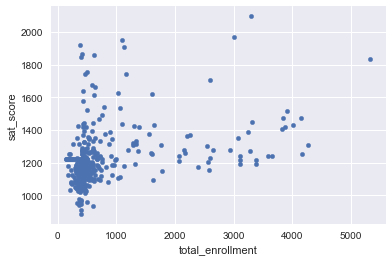

In [214]:
combined.plot.scatter(x='total_enrollment',y='sat_score')

In [215]:
low_enrollment = combined[(combined.total_enrollment < 1000) & (combined.sat_score  < 1000)]

In [219]:
low_enrollment.ell_percent#low enrollment and low sat score schools are international scores catering to english language learners

91     90.1
125    86.6
126    87.1
139    88.7
141    79.9
176    92.9
179    86.4
188    83.1
225    91.0
237    30.4
253    94.6
286    91.3
Name: ell_percent, dtype: float64

### low enrollment and low sat score schools are international scores catering to english language learners

## Scatter plot of ELL PERCENT and SAT SCORE

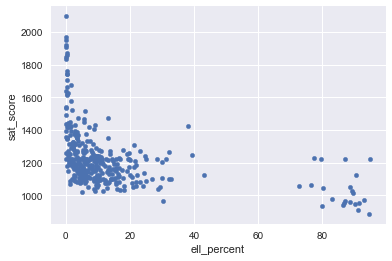

In [220]:
combined.plot.scatter(x='ell_percent',y='sat_score')

### Aggregate data by district

In [227]:
districts = combined.groupby('school_dist').mean()

In [229]:
districts.reset_index(inplace=True)

In [231]:
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,71.333333,...,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,75.453574,...,0.0,0.0,0.0,4.204005,2.963296,1132.479744,1.103862e+06,1.070438e+09,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,74.029937,...,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,76.257143,...,0.0,0.0,0.0,11.000000,8.000000,2637.000000,1.055874e+06,1.016681e+09,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,75.200881,...,0.0,0.0,0.0,9.428571,8.142857,9372.571429,1.063080e+06,1.019721e+09,40.817077,-73.949251


### Visualize correlation between survey fields and SAT score

In [233]:
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

In [236]:
correlation = combined.corr()['sat_score']

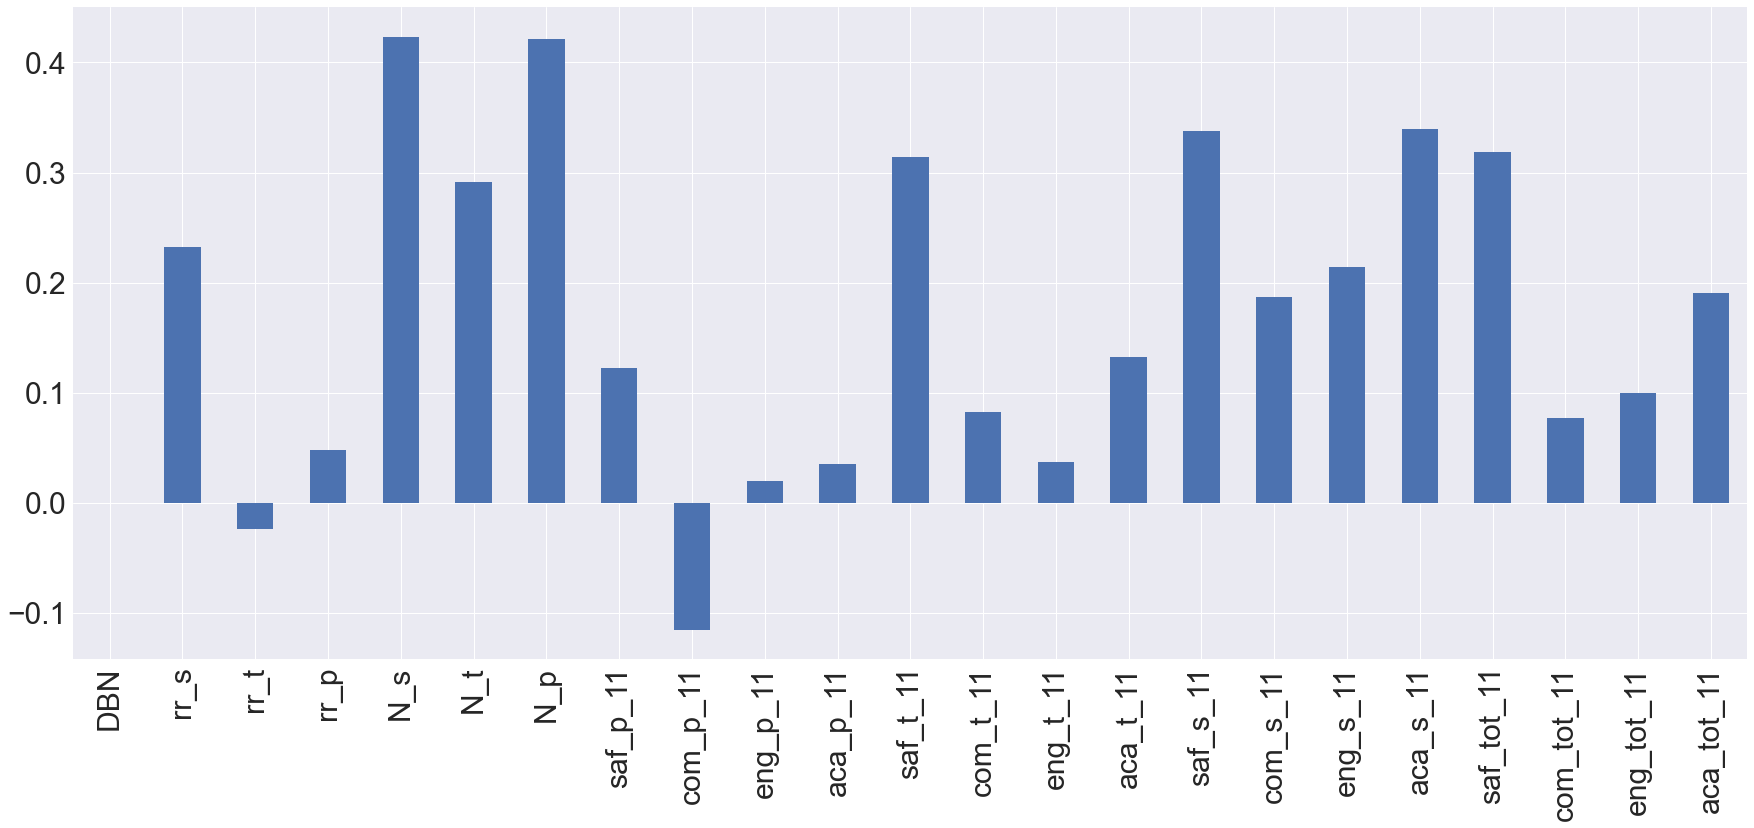

In [246]:
ax = correlation.reindex(survey_fields).plot(kind='bar',figsize=(30,12))
ax.tick_params(axis='both',labelsize=30)

## Based on NYC School Survey, there is a strong correlation between safety scores and SAT scores as well as the academic expectations of the students. Surprisingly, engagement and communication do not show strong correlations in total. In addition, the more parents, teachers, and students that responded is correlated with a higher SAT Score. The answers of Parents to survey questions did not have any strong correlations

## Investigate Safety Scores

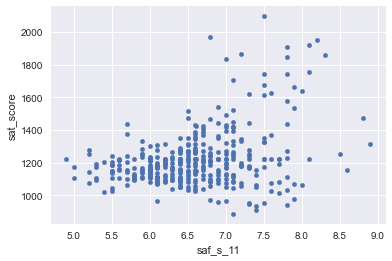

In [248]:
combined.plot.scatter(x='saf_s_11',y='sat_score')

In [251]:
average_student_safety_score_by_borough = combined.groupby('borough').saf_s_11.mean()#average_student_safety_score_by_bou=rou

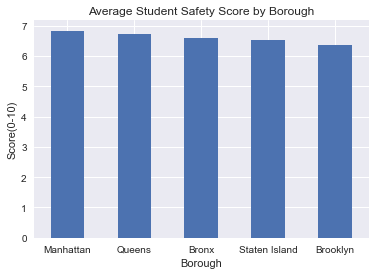

In [260]:
ax = average_student_safety_score_by_borough.sort_values(ascending=False).plot(kind='bar')
ax.tick_params(labelrotation=0)
ax.set_title("Average Student Safety Score by Borough")
ax.set_xlabel("Borough")
ax.set_ylabel("Score(0-10)");

### More affluent boroughs tend to have higher student safety scores

## Investigate racial differences in SAT Scores

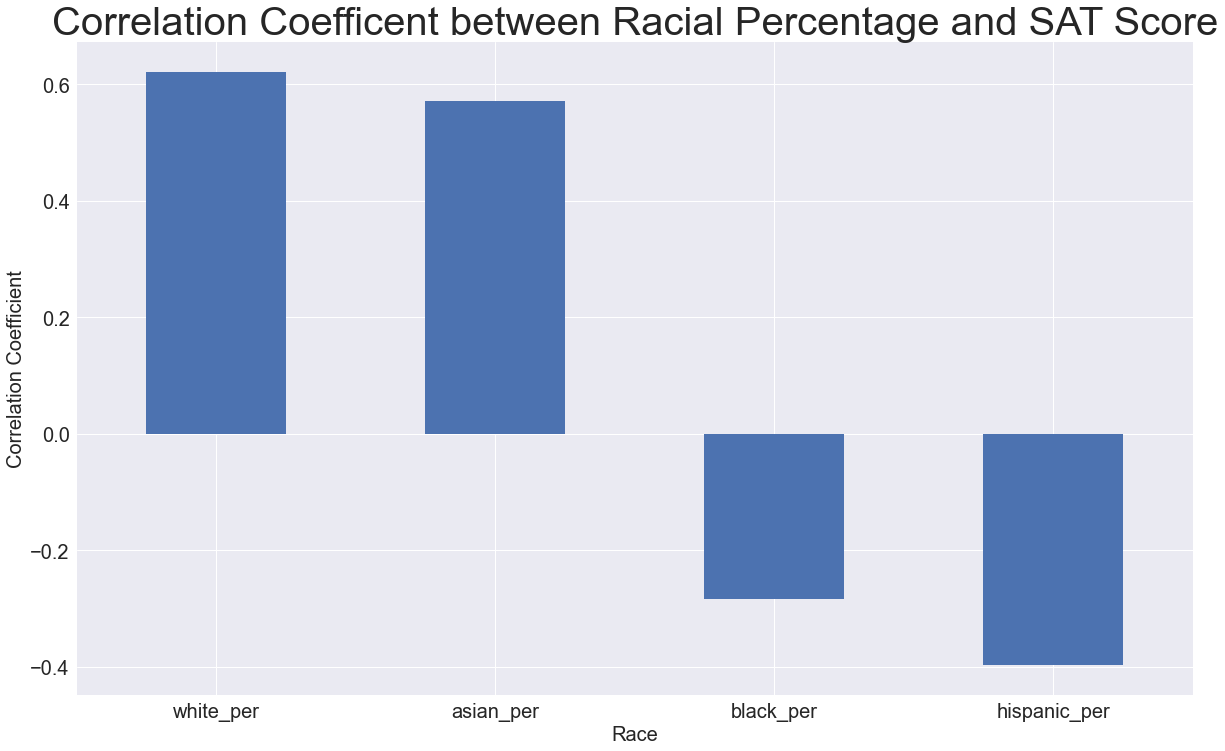

In [272]:
ax = correlation[['white_per','asian_per','black_per','hispanic_per']].sort_values(ascending=False).plot(kind='bar',figsize=(20,12))
ax.set_title("Correlation Coefficent between Racial Percentage and SAT Score",fontsize=40)
ax.set_ylabel("Correlation Coefficient",fontsize=20)
ax.set_xlabel("Race",fontsize=20)
ax.tick_params(labelsize=20,labelrotation=0);

## Positive correlation between white and asian percentage and SAT score while negative correlation between African-American and Hispanic percentage and SAT score

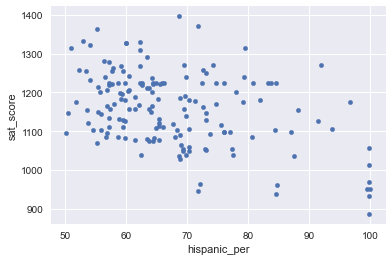

In [276]:
combined[(combined.sat_score < 1400) & (combined.hispanic_per > 50)].plot.scatter(x='hispanic_per',y='sat_score')

## Schools with majority hispanics and low SAT scores show a slight trend in lower SAT Scores as the percentage increases. This could be due to a higher percentage of English Language Learners

## Investigate gender differences in SAT Scores

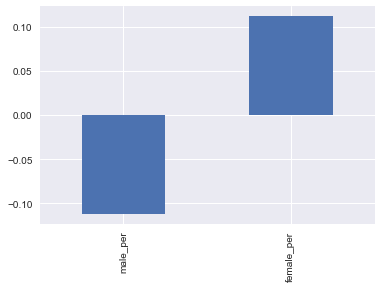

In [281]:
correlation[['male_per','female_per']].plot(kind='bar')

### A higher female percentage has a slight positive correlation while higher male percentage has a slight negative correlation

In [284]:
combined[(combined.sat_score >= 1700) & (combined.female_per >= 60)]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist
5,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624.0,604.0,628.0,1856.0,0,129.028846,197.038462,...,"525 East Houston Street\nNew York, NY 10002\n(...",3.0,2.0,1002.0,1004062.0,1.003250e+09,Lower East Side ...,40.718962,-73.976066,01
26,02M416,ELEANOR ROOSEVELT HIGH SCHOOL,127,572.0,594.0,592.0,1758.0,Eleanor Roosevelt High School,155.000000,235.000000,...,"411 East 76 Street\nNew York, NY 10021\n(40.77...",8.0,5.0,132.0,1045949.0,1.014710e+09,Lenox Hill-Roosevelt Island ...,40.770116,-73.953379,02
60,03M479,BEACON HIGH SCHOOL,261,577.0,575.0,592.0,1744.0,BEACON SCHOOL,166.000000,197.000000,...,"227 243 West 61St Street\nNew York, NY 10023\n...",7.0,6.0,151.0,1030328.0,1.011540e+09,Lincoln Square ...,40.772158,-73.987797,03
61,03M485,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...,531,566.0,564.0,577.0,1707.0,FIORELLO H.LAGUARDIA HS,691.000000,1236.000000,...,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",7.0,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,40.773671,-73.985269,03
302,25Q525,TOWNSEND HARRIS HIGH SCHOOL,278,621.0,651.0,638.0,1910.0,TOWNSEND HARRIS HS,613.000000,796.000000,...,"149 11 Melbourne Avenue\nFlushing, NY 11367\n(...",8.0,24.0,809.0,4538714.0,4.065070e+09,Kew Gardens Hills ...,40.734408,-73.821417,25


## Schools with high female percenatge and high SAT Scores are among top schools in city and even nationwide

## Investigate correlation between AP Test Stats and SAT Scores

### Create column with percentage of students who took AP Test

In [286]:
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']

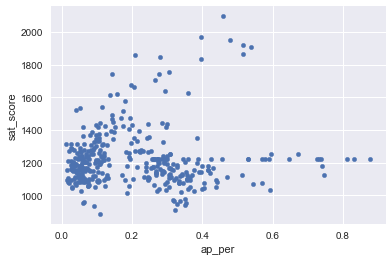

In [288]:
combined.plot.scatter(x='ap_per',y='sat_score')

### Interestingly, there is not a strong relationship between more AP Test Takers and higher SAT Scores

In [289]:
combined.sat_score.corr(combined.ap_per)

0.05717081390766968

### Future Work

<ul>
    <li> Determine whether there's a correlation between class size and SAT Scores</li>
    <li> Figure out the neighborhoods that have best schools -> if combine with a property value dataset, can find inexpensive neighborhoods with great schools</li>